In [173]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [174]:
diet_df = pd.read_csv('diet_history.csv')

In [175]:
diet_df

,Gewicht,Verlust/Woche,Diät intakt,Mifflin St. Jeor Formel,Harris Benedict Formel,Durchschnitt,Tagesdefizit,Tageskonsum,BMI
0,"129,60","-0,90","1,00","2274,00","2526,32","2400,16","-359,16","2041,00","39,13"
1,"129,30","-0,30","1,00","2265,00","2513,99","2389,50","-389,50","2000,00","39,04"
2,"128,00","-1,30","1,00","2262,01","2509,88","2385,94","-485,94","1900,00","38,64"
3,"127,90","-0,10","1,00","2249,02","2492,07","2370,55","-270,55","2100,00","38,61"
4,"127,20","-0,70","1,00","2248,02","2490,70","2369,36","-231,36","2138,00","38,40"
5,"126,20","-1,00","1,00","2241,03","2481,11","2361,07","-453,07","1908,00","38,10"
6,"125,30","-0,90","1,00","2231,04","2467,41","2349,22","-349,22","2000,00","37,83"
7,"124,30","-1,00","1,00","2222,05","2455,08","2338,56","-169,56","2169,00","37,53"
8,"124,10","-0,20","0,00","2212,06","2441,38","2326,72","-4,72","2322,00","37,47"
9,"123,80","-0,30","0,00","2210,06","2438,64","2324,35","-55,35","2269,00","37,37"


# Data preparation

In [176]:
diet_df.dtypes

Gewicht                    object
Verlust/Woche              object
Diät intakt                object
Mifflin St. Jeor Formel    object
Harris Benedict Formel     object
Durchschnitt               object
Tagesdefizit               object
Tageskonsum                object
BMI                        object
dtype: object

In [197]:
# clean and convert columns to proper data type
for col, series in diet_df.items():
    diet_df[col] = diet_df[col].apply(lambda o: str(o).replace(",",".")).astype(float)

print(diet_df)

    Gewicht  Verlust/Woche  Diät intakt  Mifflin St. Jeor Formel  \
0     129.6           -0.9          1.0                  2274.00   
1     129.3           -0.3          1.0                  2265.00   
2     128.0           -1.3          1.0                  2262.01   
3     127.9           -0.1          1.0                  2249.02   
4     127.2           -0.7          1.0                  2248.02   
5     126.2           -1.0          1.0                  2241.03   
6     125.3           -0.9          1.0                  2231.04   
7     124.3           -1.0          1.0                  2222.05   
8     124.1           -0.2          0.0                  2212.06   
9     123.8           -0.3          0.0                  2210.06   
10    122.7           -1.1          1.0                  2207.06   
11    124.8            2.1          0.0                  2196.07   
12    125.3            0.5          0.0                  2217.05   
13    125.2           -0.1          0.0         

In [181]:
diet_df.dtypes

Gewicht                    object
Verlust/Woche              object
Diät intakt                object
Mifflin St. Jeor Formel    object
Harris Benedict Formel     object
Durchschnitt               object
Tagesdefizit               object
Tageskonsum                object
BMI                        object
dtype: object

## Select matrices

In [134]:
y = diet_df.iloc[:,1].values
x = diet_df.drop(columns=["loss"]).values
x

array([[  129.6,  2041. ,  5000. ],
       [  129.3,  2000. ,  5000. ],
       [  128. ,  1900. , 10000. ],
       [  127.9,  2100. ,  5000. ],
       [  127.2,  2138. ,  5937. ],
       [  126.2,  1908. ,  7699. ],
       [  125.3,  2000. ,  8349. ],
       [  124.3,  2169. ,  7961. ],
       [  124.1,  2322. ,  7019. ],
       [  123.8,  2269. ,  8382. ],
       [  122.7,  2160. ,  8699. ],
       [  124.8,  2636. ,  5640. ],
       [  125.3,  2723. ,  8447. ],
       [  125.2,  2827. ,  7494. ],
       [  122.5,  1819. ,  7129. ],
       [  121.9,  1800. ,  7000. ]])

In [135]:
print(y)

[-0.9 -0.3 -1.3 -0.1 -0.7 -1.  -0.9 -1.  -0.2 -0.3 -1.1  2.1  0.5 -0.1
 -2.7 -0.6]


In [136]:
# fill missing data
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=5000)
imputer.fit(x)
x = imputer.transform(x)

print(x)

[[  129.6  2041.   5000. ]
 [  129.3  2000.   5000. ]
 [  128.   1900.  10000. ]
 [  127.9  2100.   5000. ]
 [  127.2  2138.   5937. ]
 [  126.2  1908.   7699. ]
 [  125.3  2000.   8349. ]
 [  124.3  2169.   7961. ]
 [  124.1  2322.   7019. ]
 [  123.8  2269.   8382. ]
 [  122.7  2160.   8699. ]
 [  124.8  2636.   5640. ]
 [  125.3  2723.   8447. ]
 [  125.2  2827.   7494. ]
 [  122.5  1819.   7129. ]
 [  121.9  1800.   7000. ]]


# 1.2 Check if it is a linear problem

### 1.2.1 weight relation to loss

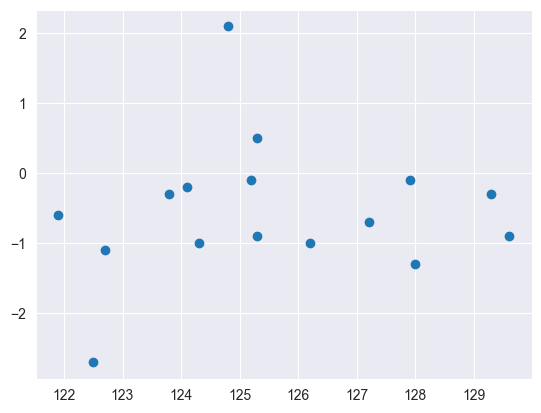

In [137]:
plt.scatter(x[:,0],y)
plt.show()

### 1.2.1 kcal relation to loss

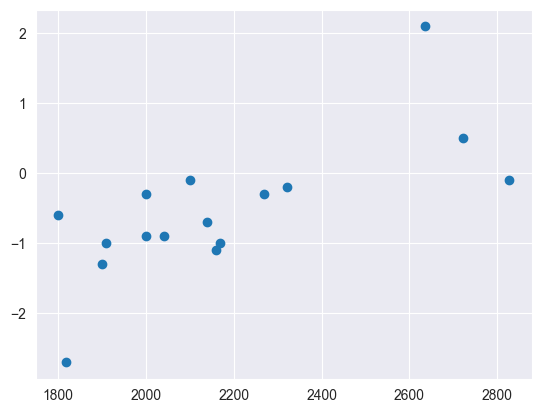

In [138]:
plt.scatter(x[:,1],y)
plt.show()

### 1.2.1 steps relation to loss

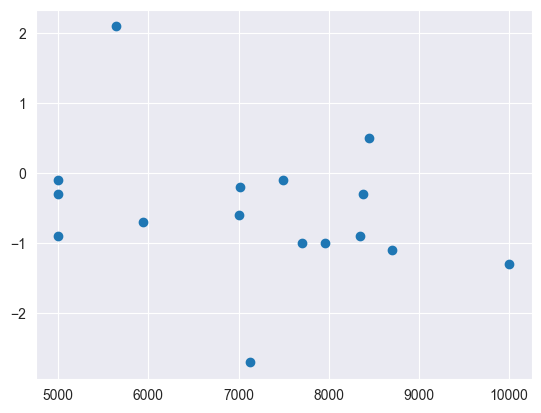

In [139]:
plt.scatter(x[:,2],y)
plt.show()

In [140]:
correlation = pd.DataFrame(x)
correlation['loss'] = y
correlation['weight'] = correlation[0]
correlation['kcal'] = correlation[1]
correlation['steps'] = correlation[2]
correlation.drop(columns=[0,1,2], inplace=True)

correlation = correlation.corr()
print(correlation)

            loss    weight      kcal     steps
loss    1.000000  0.108058  0.709347 -0.300731
weight  0.108058  1.000000 -0.074363 -0.430100
kcal    0.709347 -0.074363  1.000000  0.014338
steps  -0.300731 -0.430100  0.014338  1.000000


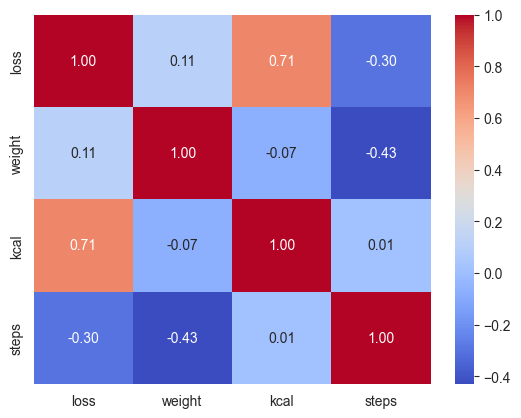

In [141]:
sns.heatmap(correlation,cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

## Split dataset in training and test set


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Feature scaling

In [143]:
feature_scaling = False
if feature_scaling:
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

In [144]:
if feature_scaling:
    print(x_train)

In [145]:
if feature_scaling:
    print(x_test)

## Training

In [146]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Prediction

In [147]:
print(x_test)

[[ 129.3 2000.  5000. ]
 [ 125.3 2000.  8349. ]
 [ 124.1 2322.  7019. ]
 [ 123.8 2269.  8382. ]]


In [148]:
y_predicted = regressor.predict(x_test)

comparison = y_predicted.reshape(len(y_predicted),1)
comparison = np.concatenate((comparison,y_test.reshape(len(y_test),1)), axis=1)

print(y_predicted)
print(y_test)
print(comparison)

[-0.612 -0.992 -0.706 -0.963]
[-0.3 -0.9 -0.2 -0.3]
[[-0.612 -0.3  ]
 [-0.992 -0.9  ]
 [-0.706 -0.2  ]
 [-0.963 -0.3  ]]


[-0.612 -0.992 -0.706 -0.963]


In [150]:
r2_score(y_test,y_predicted)

-1.6062211382113807

In [152]:
x_example = [
    [122,2000, 5000]
]
if feature_scaling:
    x_example = sc.transform(x_example)
y_predicted = regressor.predict(x_example)

print(y_predicted)

[-0.785]
